## Implementing and exploring cost function for linear regression with one variable

### Problem statement 
A model that can predict housing prices given the size of the house.
Using the same two data points as before the previous lab- a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.
| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [4]:
import numpy as np 
import matplotlib.pyplot as plt

x_train=np.array([1.0,2.0])
y_train=np.array([300.0,500.0])

### Computing Cost
Housing cost is 'price' and 'cost' is how well our model is predicting the target price of the house.

The equation for cost with one variable is:

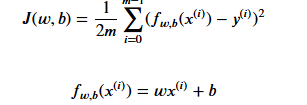

  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, summation ranges are typically from 1 to m, while code will be from 0 to m-1.


In [5]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x_train.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

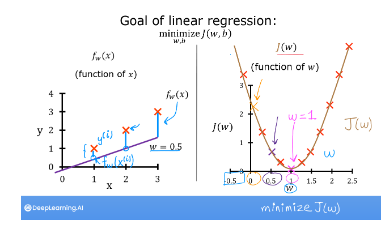

Now, 
The goal is to find a model  𝑓𝑤,𝑏(𝑥)=𝑤𝑥+𝑏 <br>
 , with parameters  𝑤,𝑏 <br>
 , which will accurately predict house values given an input  𝑥 <br>
 . The cost is a measure of how accurate the model is on the training data. <br>

The cost equation above shows that if  𝑤 and  𝑏 can be selected such that the predictions <br>  𝑓𝑤,𝑏(𝑥)
  match the target data  𝑦 <br>
 , the  (𝑓𝑤,𝑏(𝑥(𝑖))−𝑦(𝑖))2
  term will be zero and the cost minimized. <br>

Setting b= 100. 


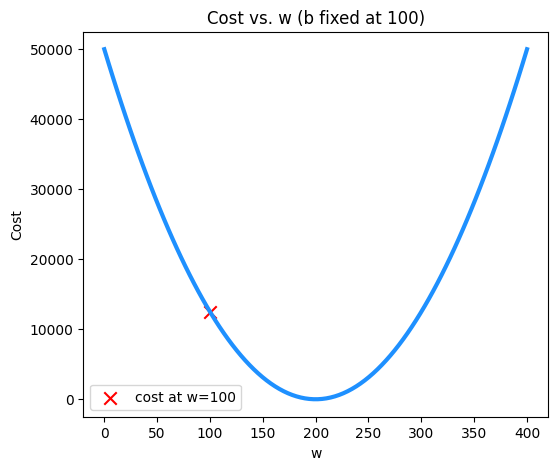

In [6]:
# Prepare range of w values
b_fixed = 100
w_values = np.linspace(0, 400, 100)
cost_values = np.array([compute_cost(x_train, y_train, w, b_fixed) for w in w_values])

# Choose one w to highlight
w_highlight = 100
cost_highlight = compute_cost(x_train, y_train, w_highlight, b_fixed)
# Plot
plt.figure(figsize=(6, 5))
plt.plot(w_values, cost_values, color='dodgerblue', linewidth=3)  #Our values
plt.scatter(w_highlight, cost_highlight, color='red', marker='x', s=80, label=f"cost at w={w_highlight}") 
plt.title(f"Cost vs. w (b fixed at {b_fixed})")
plt.xlabel("w")
plt.ylabel("Cost")
plt.legend()
plt.grid(False)
plt.show()

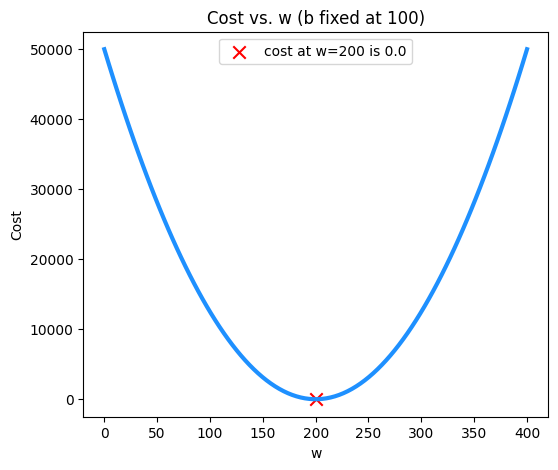

In [7]:
# Prepare range of w values
b_fixed = 100
w_values = np.linspace(0, 400, 100)
cost_values = np.array([compute_cost(x_train, y_train, w, b_fixed) for w in w_values])

# Choose one w to highlight
w_highlight = 200
cost_highlight = compute_cost(x_train, y_train, w_highlight, b_fixed)
# Plot
plt.figure(figsize=(6, 5))
plt.plot(w_values, cost_values, color='dodgerblue', linewidth=3)  #Our values
plt.scatter(w_highlight, cost_highlight, color='red', marker='x', s=80, label=f"cost at w={w_highlight} is {cost_highlight}") 
plt.title(f"Cost vs. w (b fixed at {b_fixed})")
plt.xlabel("w")
plt.ylabel("Cost")
plt.legend()
plt.grid(False)
plt.show()

w: 200
b: 100
[300. 500.]


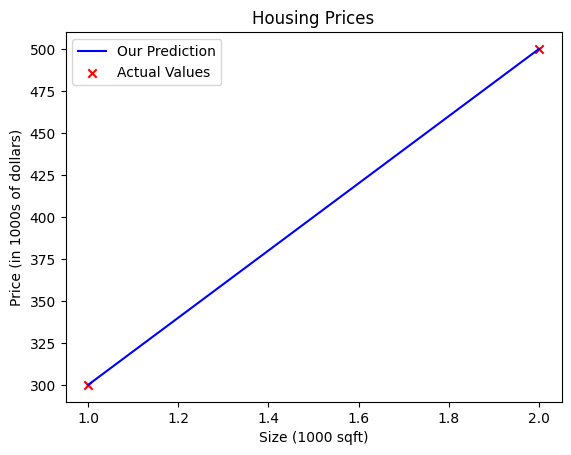

In [8]:
## Since, w=200, the cost is 0.0. Choosing w=200 and b=0. Plotting 
#Computing for x^(0) and x^(1)
"""The formula is:
    for x^(0), f_wb = w * x[0] + b
    for x^(1), f_wb = w * x[1] + b"""
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

# Changine values of w and b
w = 200
b = 100
print(f"w: {w}")
print(f"b: {b}")


tmp_f_wb = compute_model_output(x_train, w, b,)
print(tmp_f_wb)

# Plotting our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()


The plot contains a few points that are worth mentioning.

cost is minimized when  𝑤=200
 , which matches results from the previous lab
Because the difference between the target and pediction is squared in the cost equation, the cost increases rapidly when  𝑤
  is either too large or too small.
Using the w and b selected by minimizing cost results in a line which is a perfect fit to the data.

### Cost Function Visualization- 3D
To see how cost varies with respect to both w and b by plotting in 3D or using a contour plot.
The routines are in lab_utils_uni.py in the local directory.

### Larger Data Set
It is instructive to view a scenario with a few more data points. This data set includes data points that do not fall on the same line. What does that mean for the cost equation? Can we find  𝑤, and  𝑏 that will give us a cost of 0?

In [9]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In the contour plot, We can click to select w and b to achieve the lowest cost with help of mouse cursor.

In [10]:
# Reload the module
%load_ext autoreload
%autoreload 2
from lab_utils_uni import plt_stationary, plt_update_onclick, soup_bowl


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


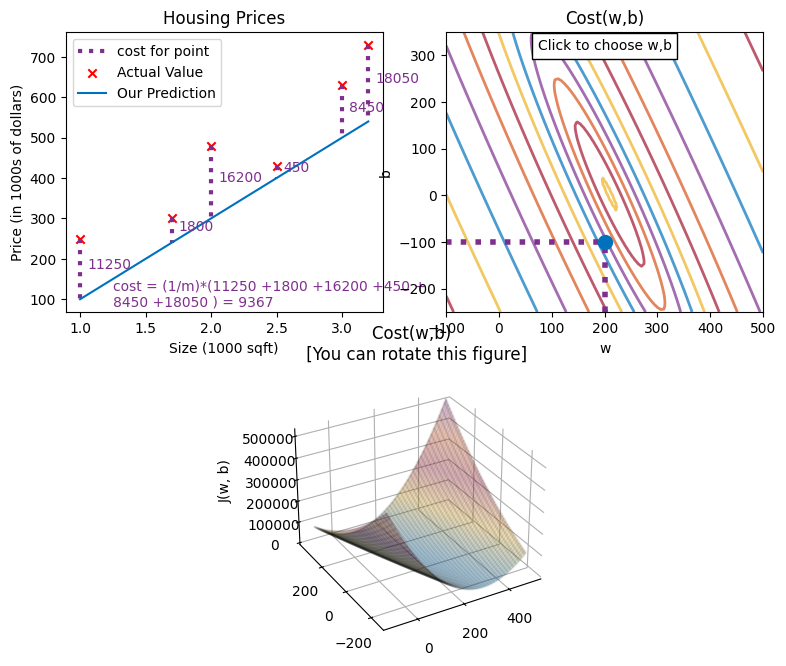

In [ ]:
# plt.close('all') 
# fig, ax, dyn_items = plt_stationary(x_train, y_train)
# updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)